In [1]:
# Import Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.tools as tls

warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('fivethirtyeight')
pyo.init_notebook_mode(connected=True)

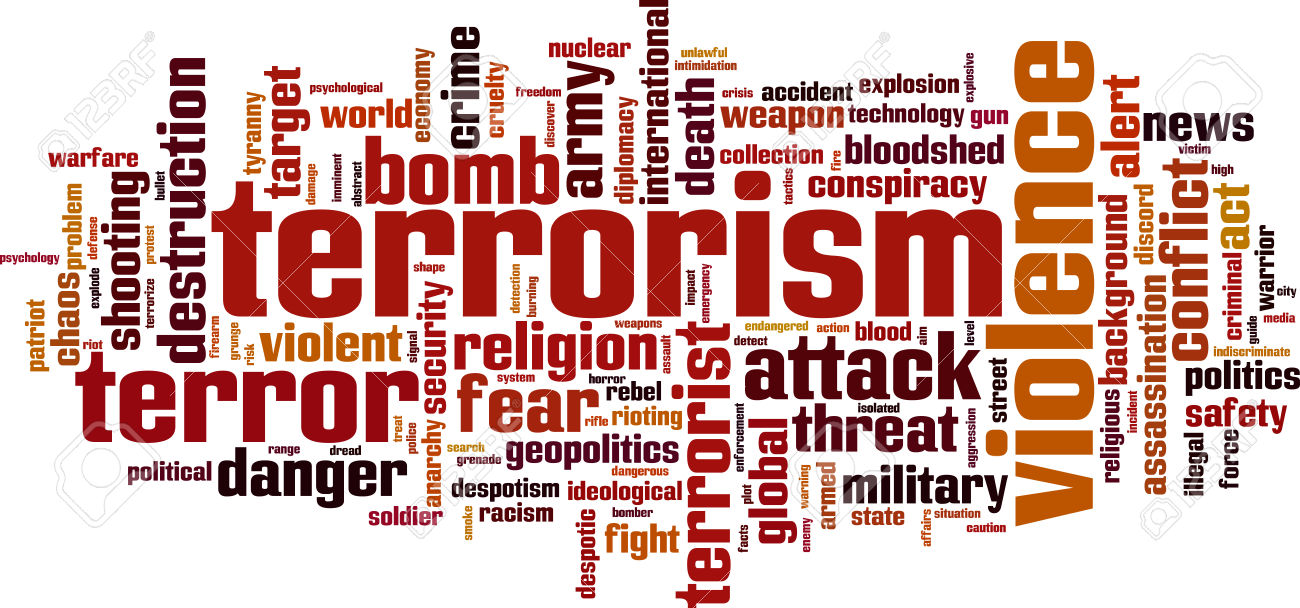

In [2]:
Image('Terrorism-Word-Cloud.jpg')

Information on more than 180,000 Terrorist Attacks

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks

In [3]:
# Load the Dataset

data = pd.read_csv('global_terrorism.csv',encoding='iso-8859-1')

In [4]:
# Cleaning Data

data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['casualities']=data['Killed']+data['Wounded']
data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [5]:
# Shape of Data

data.shape

(181691, 18)

181691 entries with 18 features

In [6]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')

In [7]:
# Basic info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
Year           181691 non-null int64
Month          181691 non-null int64
Day            181691 non-null int64
Country        181691 non-null object
Region         181691 non-null object
city           181257 non-null object
latitude       177135 non-null float64
longitude      177134 non-null float64
AttackType     181691 non-null object
Killed         171378 non-null float64
Wounded        165380 non-null float64
Target         181055 non-null object
Summary        115562 non-null object
Group          181691 non-null object
Target_type    181691 non-null object
Weapon_type    181691 non-null object
Motive         50561 non-null object
casualities    164817 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 25.0+ MB


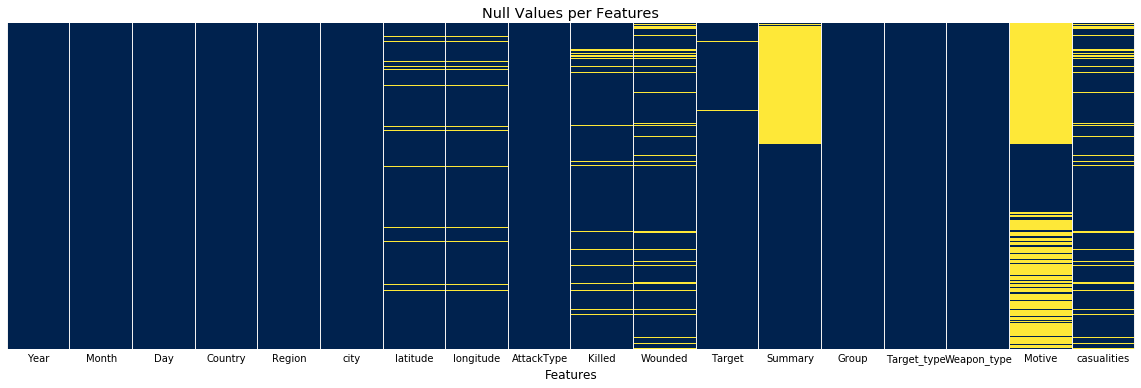

In [8]:
# Checking null values in dataset

plt.figure(figsize=(18,6))
sns.heatmap(data.isnull(),cmap='cividis',cbar=False,yticklabels=False)
plt.title('Null Values per Features')
plt.xlabel('Features')
plt.xticks(rotation=0);

From above visualization, we can see that 'Motive' feature is majorly null, so we can drop it.

In [9]:
data.drop('Motive',axis=1,inplace=True)

In [10]:
# Looking at data agian

data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [11]:
# General Description about data

data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [12]:
data.dtypes

Year             int64
Month            int64
Day              int64
Country         object
Region          object
city            object
latitude       float64
longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
casualities    float64
dtype: object

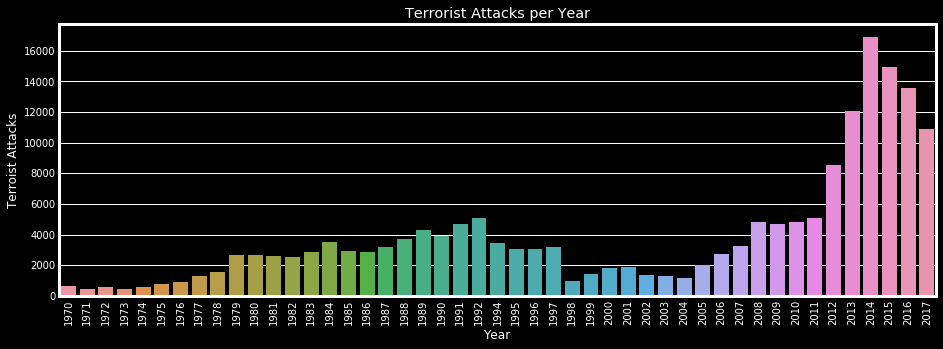

In [13]:
plt.style.use('dark_background')
plt.figure(figsize=(14,5))
sns.countplot(data['Year'])
plt.ylabel('Terroist Attacks')
plt.title('Terrorist Attacks per Year')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Terrorist Attack Count Per Month')

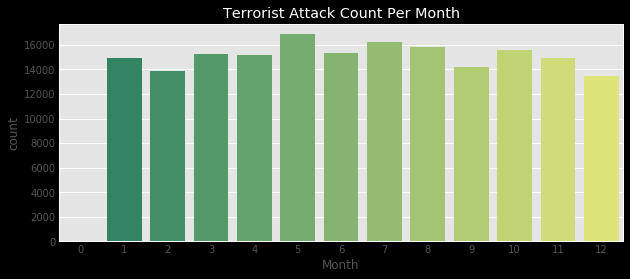

In [14]:
# Looking at the months 
plt.figure(figsize=(9,4))
plt.style.use('ggplot')
sns.countplot(data['Month'],palette='summer')
plt.title('Terrorist Attack Count Per Month')

In [15]:
 data[data['Month']==0].head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,casualities
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,0.0
1123,1972,0,0,Philippines,Southeast Asia,Roxas,11.586558,122.753716,Bombing/Explosion,0.0,0.0,air manila fokker F-27p,NaN,Unknown,Airports & Aircraft,Explosives,0.0
1690,1973,0,0,Colombia,South America,unknown,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,"Alirio Serrano Sanchez, rancher",NaN,National Liberation Army of Colombia (ELN),Business,Unknown,0.0
2164,1974,0,0,France,Western Europe,Paris,48.856644,2.342330,Bombing/Explosion,0.0,0.0,Bank Lazard,NaN,Unknown,Business,Explosives,0.0
2165,1974,0,0,Italy,Western Europe,Rome,41.890961,12.490069,Bombing/Explosion,0.0,0.0,TWA Boeing 707,NaN,Unknown,Airports & Aircraft,Explosives,0.0


As Month and Day cannot be zero, we assume that attacks to be happend at January 1st

In [16]:
data[data['Month']==0]['Month'] = 1

In [17]:
def zero_one(x):
    if x==0:
        return 1
    return x

data['Month'] = data['Month'].apply(zero_one)
data['Day'] = data['Day'].apply(zero_one)

In [18]:
data[(data['Month']==0) | (data['Day']==0)]

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,casualities


Text(0.5, 1.0, 'Terrorist Attack Count Per Month')

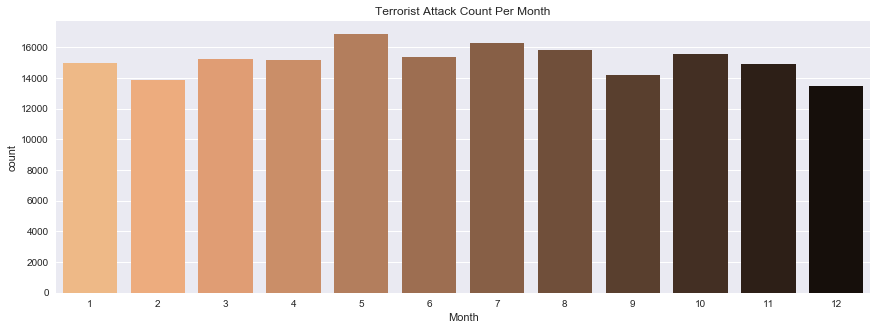

In [19]:
# Looking at the months 
plt.figure(figsize=(13,5))
plt.style.use('seaborn')
sns.countplot(data['Month'],palette='copper_r')

plt.title('Terrorist Attack Count Per Month')

From this chart ,we can see that ,Months are fairly distributed 

In [20]:
attack = pd.DataFrame(data['AttackType'].value_counts()).reset_index()

Text(0, 0.5, 'Attack Type')

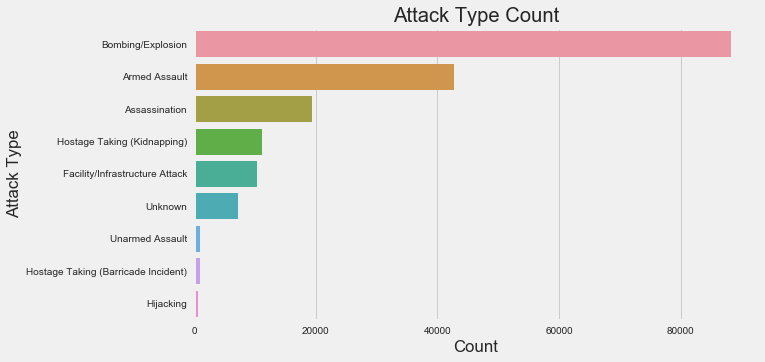

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,5))
sns.barplot(attack['AttackType'],attack['index'])
plt.title('Attack Type Count')

plt.xlabel('Count')
plt.ylabel('Attack Type')

Text(0, 0.5, ' Country ')

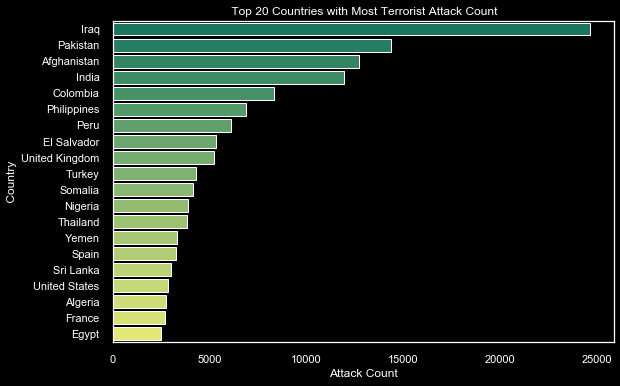

In [22]:
sns.set(style='dark')
plt.style.use('dark_background')

x = data['Country'].value_counts()[:20].reset_index()
sns.barplot(x['Country'],x['index'],palette='summer')

plt.title(' Top 20 Countries with Most Terrorist Attack Count')
plt.xlabel('Attack Count')
plt.ylabel(' Country ')

Text(0, 0.5, ' Country ')

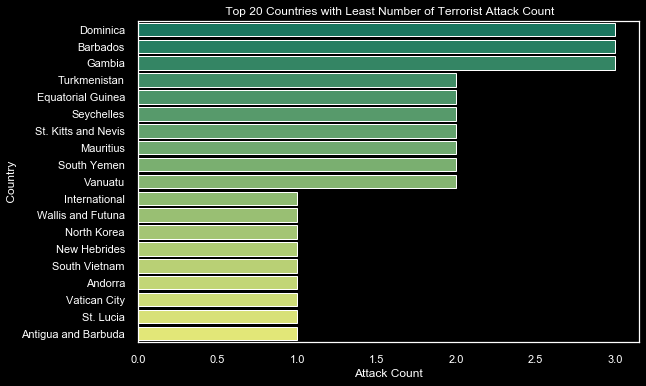

In [23]:
x = data['Country'].value_counts()[-20:-1].reset_index()
sns.barplot(x['Country'],x['index'],palette='summer')

plt.title(' Top 20 Countries with Least Number of Terrorist Attack Count')
plt.xlabel('Attack Count')
plt.ylabel(' Country ')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

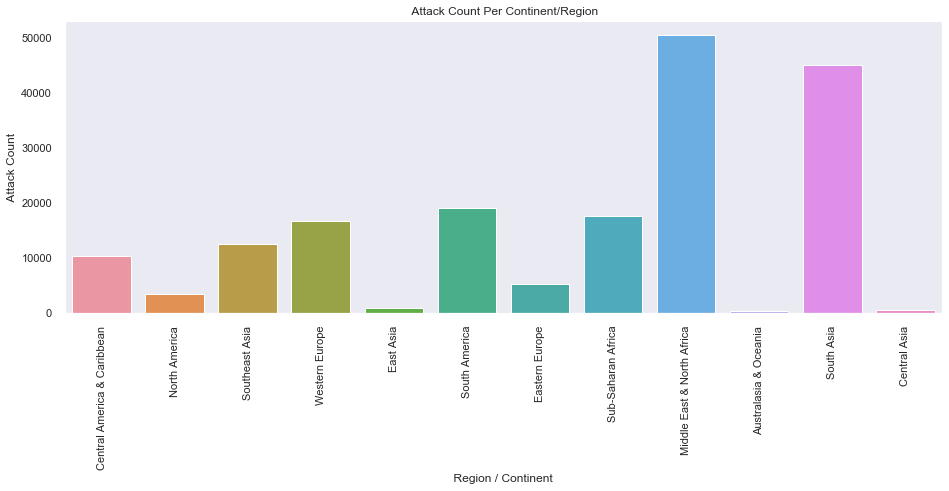

In [24]:

sns.set(style='dark')
plt.figure(figsize=(14,5))
sns.countplot(data['Region'])
plt.title(' Attack Count Per Continent/Region')
plt.xlabel(' Region / Continent ')
plt.ylabel(' Attack Count ')
plt.xticks(rotation=90)

From this we can clearly see that 'Middle East & North Africa' and 'South Asia' has most terrorist attack count.

and 'Central Asia','East Asia' and 'Austrilians and Oceania' has least number of terrorist attacks

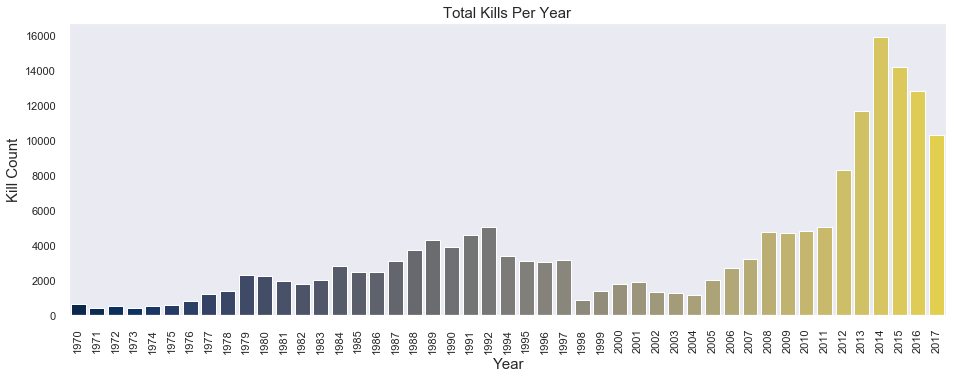

In [25]:

kill = data.groupby('Year',as_index=False).count()[['Year','Killed']]

plt.style.use('ggplot')
sns.set(style='dark')
plt.figure(figsize=(14,5))
sns.barplot(kill['Year'],kill['Killed'],palette='cividis');
plt.title('Total Kills Per Year',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Kill Count',fontsize=15)
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Region wise Terror Attack Comparison')

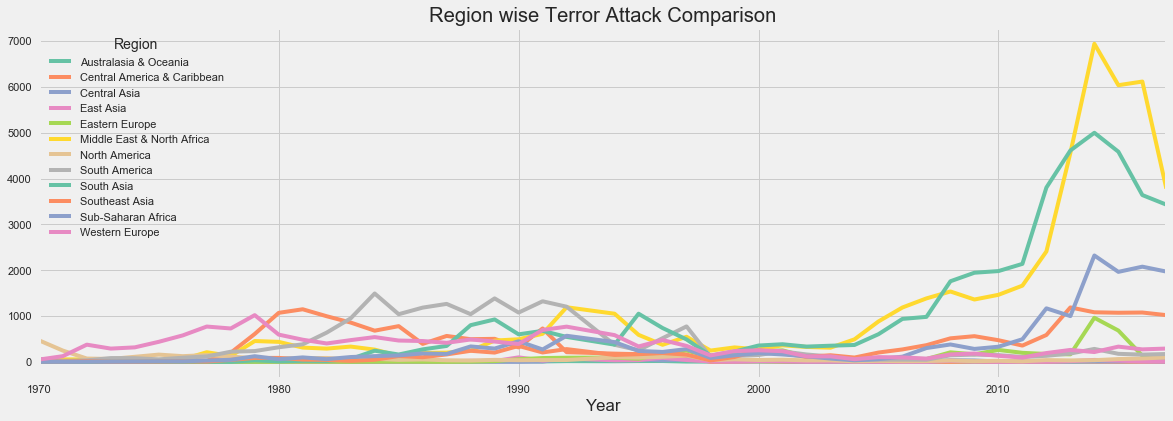

In [26]:
plt.style.use('fivethirtyeight')
region_comp=pd.crosstab(data['Year'],data['Region'])
region_comp.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Region wise Terror Attack Comparison')

Text(0, 0.5, 'Terror Attack Count')

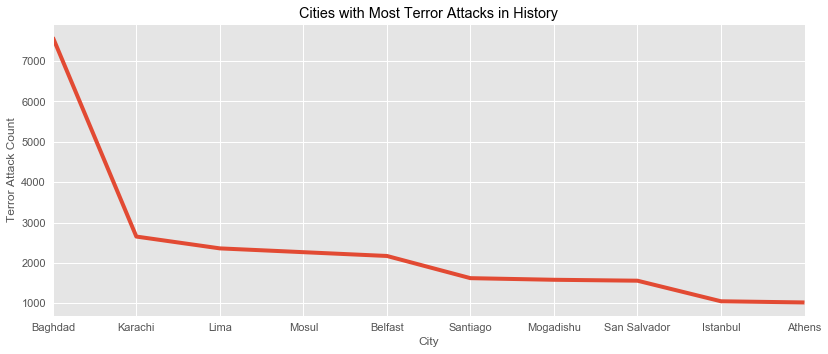

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
data['city'].value_counts()[1:11].plot()
plt.title('Cities with Most Terror Attacks in History',color='black')
plt.xlabel('City')
plt.ylabel('Terror Attack Count')


In [28]:
x = data['Group'].value_counts()[:10].reset_index()['index']
y = data['Group'].value_counts()[:10].reset_index()['Group']

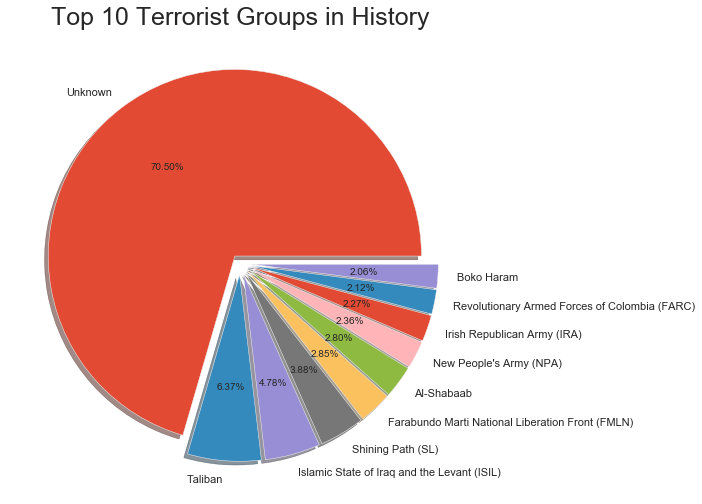

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.pie(x=y,labels=x,explode=[0.05,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06],shadow=True,autopct=lambda p: '{:.2f}%'.format(p),startangle=0);
plt.title('Top 10 Terrorist Groups in History',fontsize=25);

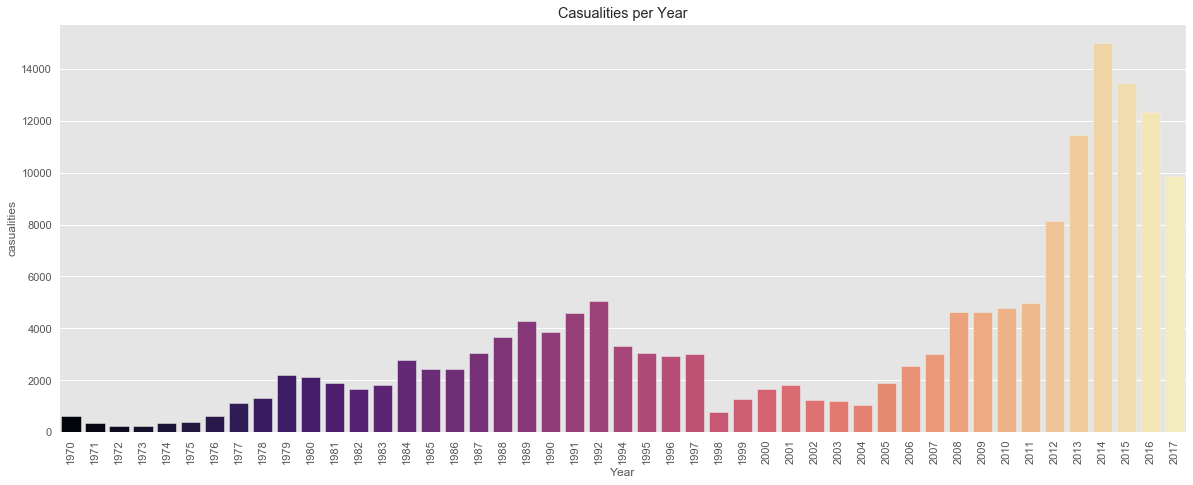

In [30]:
plt.figure(figsize=(18,7))
cas = data.groupby('Year',as_index=False).count()[['casualities','Year']]
sns.barplot(cas['Year'],cas['casualities'],palette='magma')
plt.title('Casualities per Year')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Countries with Most Deaths Due to Attacks')

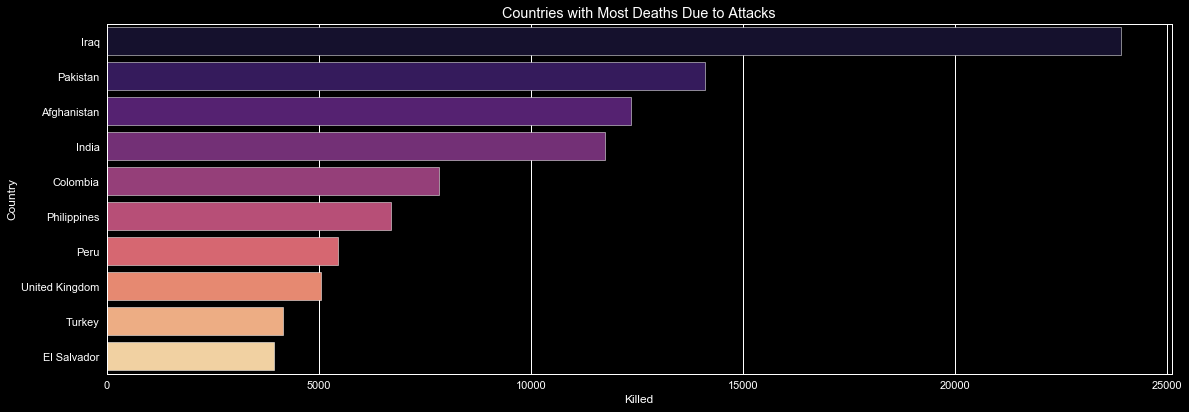

In [31]:
plt.style.use('dark_background')
coun = data.groupby('Country',as_index=False).count()[['Killed','Country']].sort_values(by='Killed',ascending=False)[:10]
plt.figure(figsize=(17,6))
sns.barplot(coun['Killed'],coun['Country'],palette='magma')
plt.title('Countries with Most Deaths Due to Attacks')

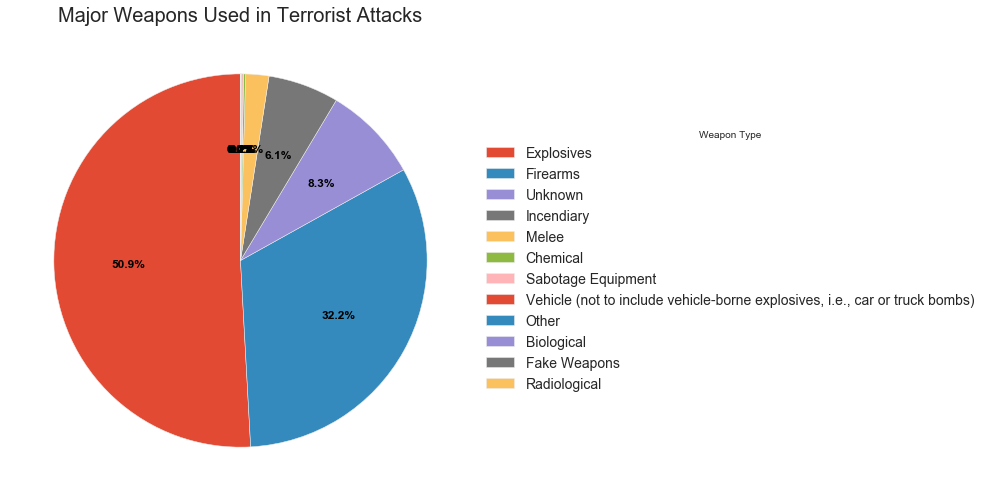

In [99]:
weapon = data['Weapon_type'].value_counts()

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

labels = weapon.keys()

w_data = weapon.unique()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(w_data, autopct=lambda pct: func(pct, w_data),startangle=90)
ax.legend(wedges, labels,
          title="Weapon Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=14)

plt.setp(autotexts, size=12 ,weight="bold",color='black')

ax.set_title("Major Weapons Used in Terrorist Attacks",fontsize=20);

Text(0.5, 0, 'Places/Types')

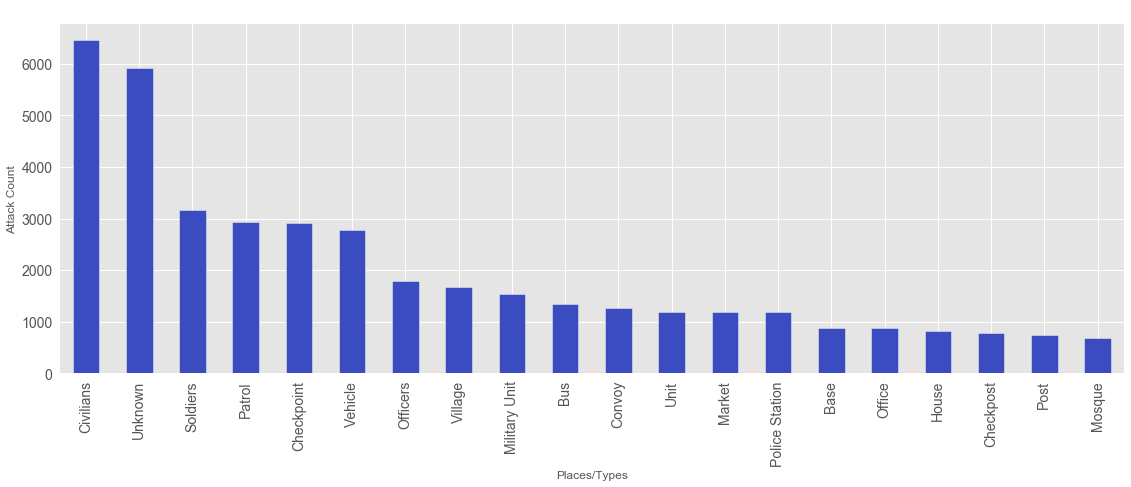

In [33]:

plt.figure(figsize=(17,6))

data['Target'].value_counts()[:20].plot(kind='bar',cmap='coolwarm',fontsize=14)
plt.title('Top 20 Most Attacked Places/Types')
plt.ylabel('Attack Count')
plt.xlabel('Places/Types')

Text(0.5, 1.0, 'Top 10 Attack Types to have attained maximum casualities')

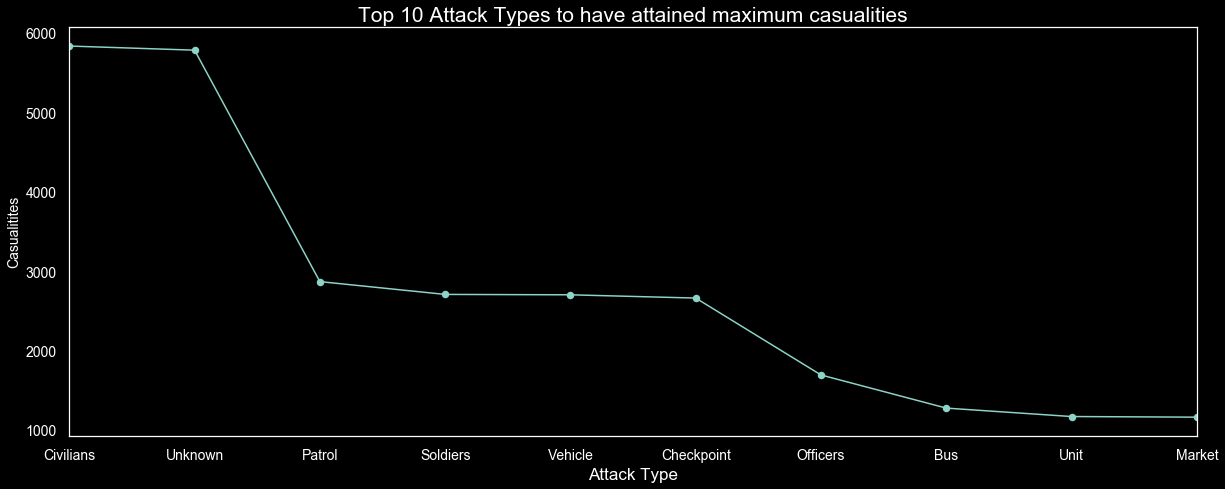

In [70]:
sns.set(style='dark')
plt.style.use('dark_background')
plt.figure(figsize=(18,7))
data.groupby('Target')['casualities'].count().sort_values(ascending=False)[:10].plot(fontsize=14,marker='.',markersize=15);
plt.ylabel('Casualitites',fontsize=14)
plt.xlabel('Attack Type',fontsize=17)
plt.title('Top 10 Attack Types to have attained maximum casualities',fontsize=21)

# Looking Specifically at India


In [39]:
india  = data[data['Country']=='India']

In [40]:
india.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,casualities
1186,1972,2,22,India,South Asia,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,0.0
2764,1975,1,2,India,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,4.0
3857,1976,5,26,India,South Asia,New Delhi,28.585836,77.153336,Bombing/Explosion,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,0.0
5327,1977,9,28,India,South Asia,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,0.0
7337,1979,1,13,India,South Asia,Unknown,26.200605,92.937574,Armed Assault,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN


Text(0, 0.5, 'Count')

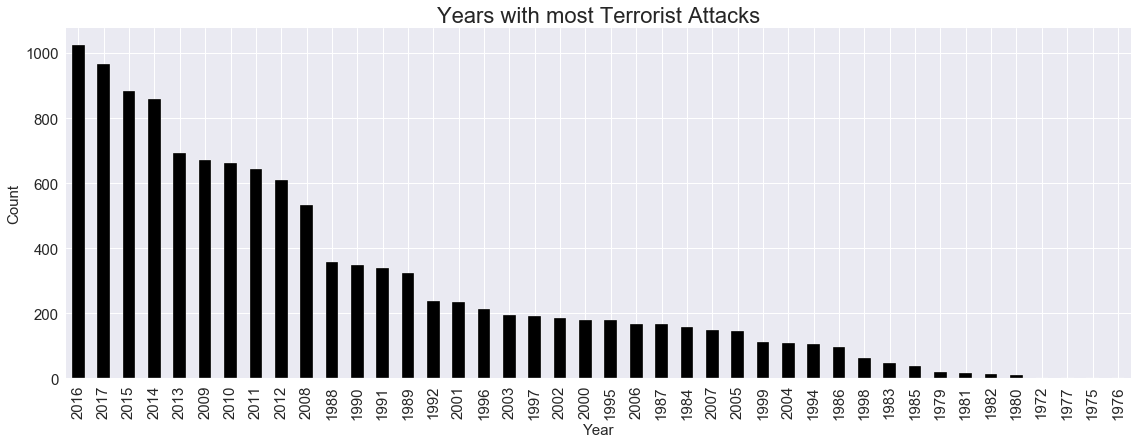

In [72]:
plt.style.use('seaborn')
plt.figure(figsize=(17,6))
india['Year'].value_counts().plot(kind='bar',fontsize=15,color='black')
plt.title('Years with most Terrorist Attacks',fontsize=22)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count',fontsize=15)

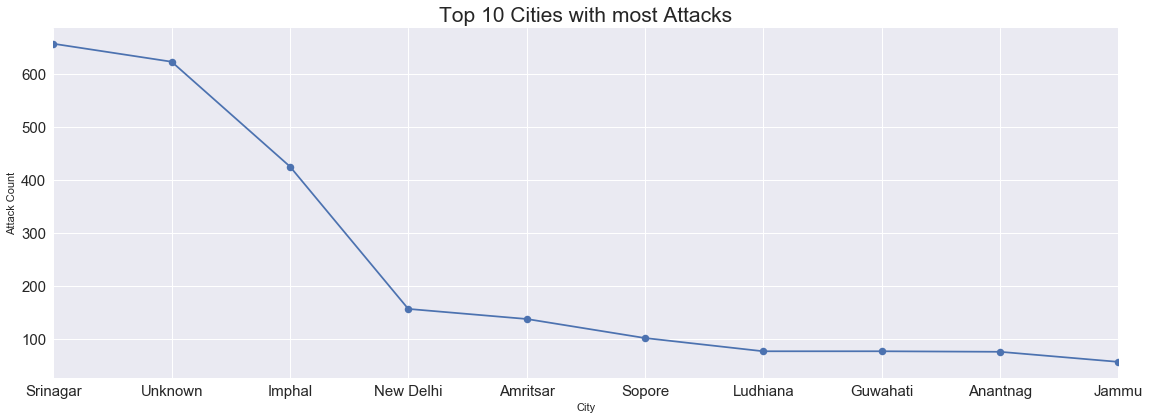

In [73]:
plt.figure(figsize=(17,6))
india['city'].value_counts()[:10].plot(fontsize=15,marker='.',markersize=15)
plt.title('Top 10 Cities with most Attacks',fontsize=21)
plt.xlabel('City')
plt.ylabel('Attack Count');

In [87]:
# Most Brutal Attacks

india[['casualities','Summary','Target']].sort_values(by='casualities',ascending=False)[:5]

,casualities,Summary,Target
81098,1005.0,07/11/2006: A series of train bombings killed ...,People in rush hour
89255,272.0,"10/30/2008: On Thursday morning at 1130, the f...",Civilians
96726,255.0,"05/28/2010: On Friday night around 0130, near ...",The Calcutta-Mumbai Express passenger train an...
30454,232.0,NaN,Express Train
79145,210.0,10/29/2005: Lashkar-e-Taiba militants under th...,The Sarojini and Paharganj marketplaces and ci...


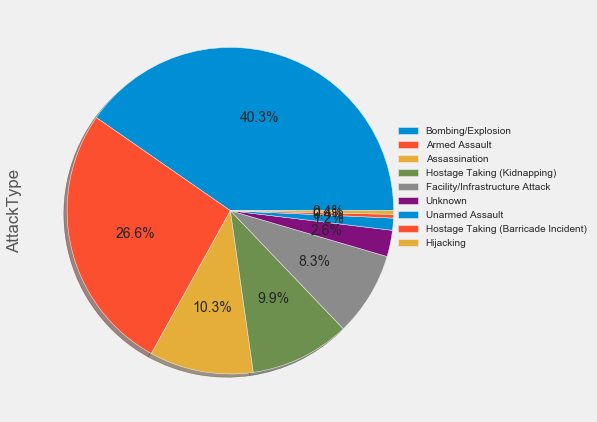

In [123]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
india['AttackType'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',labels=['','','','','','','','','',])
plt.legend(india['AttackType'].value_counts().keys(),loc=(0.9,0.4))

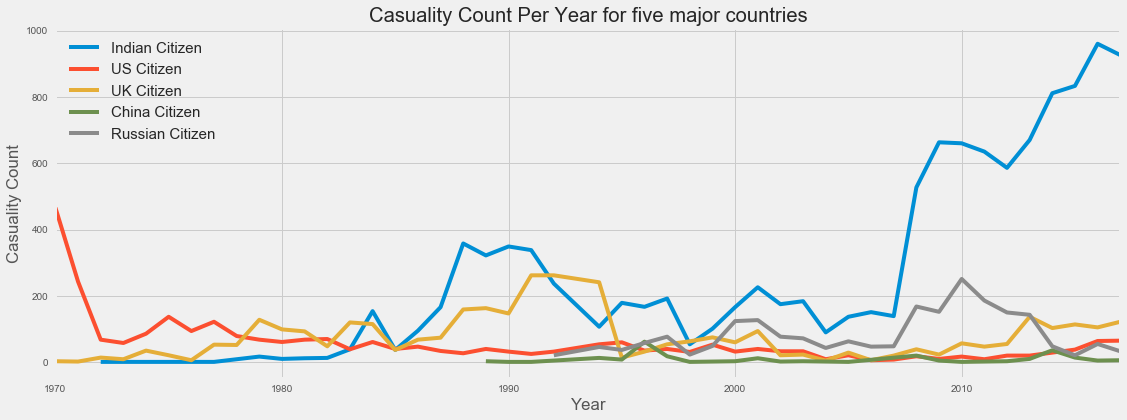

In [187]:
plt.figure(figsize=(17,6))
india.groupby('Year')['casualities'].count().plot(label='Indian Citizen')
data[data['Country']=='United States'].groupby('Year')['casualities'].count().plot(label='US Citizen')
data[data['Country']=='United Kingdom'].groupby('Year')['casualities'].count().plot(label='UK Citizen')
data[data['Country']=='China'].groupby('Year')['casualities'].count().plot(label='China Citizen')
data[data['Country']=='Russia'].groupby('Year')['casualities'].count().plot(label='Russian Citizen')
plt.legend(fontsize=15);
plt.xlabel('Year')
plt.ylabel('Casuality Count')
plt.title('Casuality Count Per Year for five major countries');

Text(0.5, 1.0, 'Most Active Terrorist Group in India(1970-2018)')

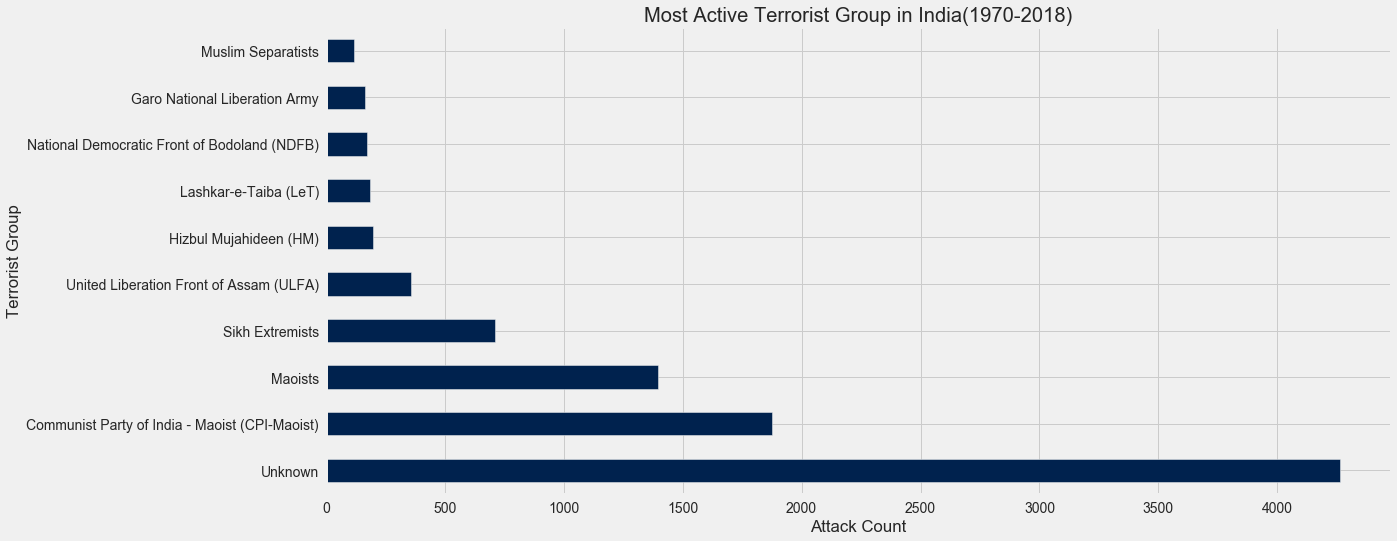

In [207]:
# Most Active Groups in India
sns.set(style='dark')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,8))
india['Group'].value_counts()[:10].plot(kind='barh',colormap='cividis',fontsize=14)
plt.xlabel('Attack Count')
plt.ylabel('Terrorist Group')
plt.title('Most Active Terrorist Group in India(1970-2018)')

# Global Terrorism Analysis is Done!!!